Transformada de Fourier dos dados de entrada:
(1+0j)
(6.123233995736766e-17-1j)
(-1-1.2246467991473532e-16j)
(-1.8369701987210297e-16+1j)


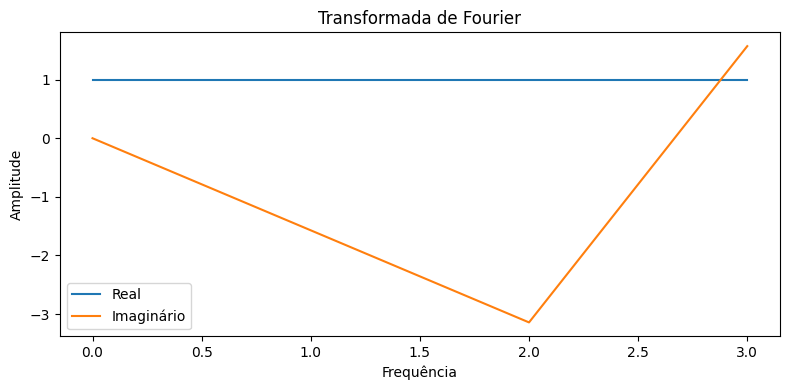

In [4]:
# Antonio Felipe de Melo Neto
# Matrícula:121111174
# Processamento Digital de Sinais (PDS)


import numpy as np
import matplotlib.pyplot as plt

def fft_dit(x): # Função de cálculo da FFT
    N = len(x) #indica o tamanho do vetor da FFT

    if N <= 1: #realiza a verificação se o vetor tem mais de 1 elemento
        return x

    elementos_pares = fft_dit(x[0::2])  #calculo da FFT dos elementos pares
    elementos_impares = fft_dit(x[1::2])   #calculo da FFT dos elementos ímpares
    fator = np.exp(-2j * np.pi * np.arange(N) / N) #calculo dos fatores complexos, para corrigir a fase da FFT completa
    X = np.concatenate([elementos_pares + fator[:N//2] * elementos_impares, elementos_pares + fator[N//2:] * elementos_impares])
    #a função "np.concatenate" encarrega-se de realizar a junção das FFT's dos elementos impares e pares e entregar a FFT completa
    return X

if __name__ == "__main__":
    N=16 # Numero de 2^N
    bits = [0, 1, 0, 0]#list(range(N)) # "criação" de um vetor de 0 à (N-1)
    x = np.array(bits, dtype=complex)
    X = fft_dit(x) # chamada do cálculo da FFT completa

# Impressão dos valores da FFT completa
    print("Transformada de Fourier dos dados de entrada:")
    for value in X:
        print(value)

# Plot em gráfico da parte real e imaginária dos valores da FFT completa
    plt.figure(figsize=(8, 4))
    plt.title("Transformada de Fourier")
    plt.plot(np.abs(X), label="Real") # Parte Real
    plt.plot(np.angle(X), label="Imaginário") # Parte Imaginária
    plt.xlabel("Frequência")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.tight_layout()
    plt.show()